In [78]:
import sys
sys.path.append('C:\\Users\\jason.huang\\PycharmProjects\\PinPoint_v2\\')
import pandas as pd
import os
import numpy as np
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import os
from collections import ChainMap
import seaborn as sns

from backtest.Backtest_Object import CashBtObj, CashBt


In [84]:
all_sample_indicator_df=pd.DataFrame()

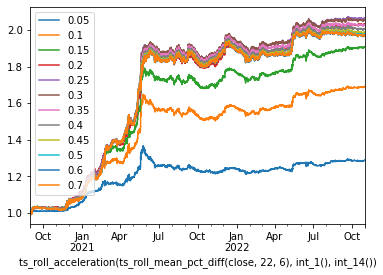

In [85]:
threshold_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,0.6,0.7]
fee_rate=5/100/100
data_all=pd.DataFrame()
indicator_all=pd.DataFrame()
for threshold in threshold_list:    
    save_location=f"C:\\Users\\jason.huang\\research\\GP_momemntum\\\crypto_binance_all_future\\longshort_adv_vwap\\crypto_binance_all_all_sample_fee_{int(fee_rate * 100 * 100 * 10)}_turnover_threshold_{int(threshold * 100)}.pkl"
    with open(save_location,'rb') as file:
        data=pickle.load(file)
        data_one=data.cash_bt_result.bt_nv
        data_one.columns=[threshold]
        data_all=pd.concat([data_all,data_one],axis=1)
        indicator_one=data.cash_bt_result.calculate_stats()
        indicator_one['threshold']=threshold
        indicator_all=pd.concat([indicator_all,indicator_one])
data_all.plot()
indicator_all[indicator_all['type']=='ALL']
indicator_all['Sample']='all_sample'
all_sample_indicator_df=pd.concat([all_sample_indicator_df,indicator_all])

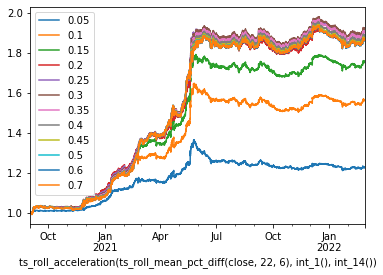

In [86]:
# insample
threshold_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,0.6,0.7]
fee_rate=5/100/100
data_all=pd.DataFrame()
indicator_all=pd.DataFrame()
for threshold in threshold_list:    
    save_location=f"C:\\Users\\jason.huang\\research\\GP_momemntum\\crypto_binance_all_future\\longshort_adv_vwap\\crypto_binance_all_fee_in_sample_{int(fee_rate * 100 * 100 * 10)}_turnover_threshold_{int(threshold * 100)}.pkl"
    with open(save_location,'rb') as file:
        data=pickle.load(file)
        data_one=data.cash_bt_result.bt_nv
        data_one.columns=[threshold]
        data_all=pd.concat([data_all,data_one],axis=1)
        indicator_one=data.cash_bt_result.calculate_stats()
        indicator_one['threshold']=threshold
        indicator_all=pd.concat([indicator_all,indicator_one])
data_all.plot()
indicator_all[indicator_all['type']=='ALL']
indicator_all['Sample']='in_sample'
all_sample_indicator_df=pd.concat([all_sample_indicator_df,indicator_all])

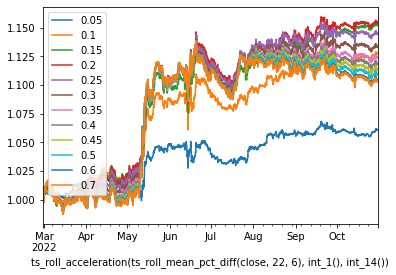

In [87]:
# out of sample
threshold_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,0.6,0.7]
fee_rate=5/100/100
data_all=pd.DataFrame()
indicator_all=pd.DataFrame()
for threshold in threshold_list:    
    save_location=f"C:\\Users\\jason.huang\\research\\GP_momemntum\\crypto_binance_all_future\\longshort_adv_vwap\\crypto_binance_all_fee_out_of_sample_{int(fee_rate * 100 * 100 * 10)}_turnover_threshold_{int(threshold * 100)}.pkl"
    with open(save_location,'rb') as file:
        data=pickle.load(file)
        data_one=data.cash_bt_result.bt_nv
        data_one.columns=[threshold]
        data_all=pd.concat([data_all,data_one],axis=1)
        indicator_one=data.cash_bt_result.calculate_stats()
        indicator_one['threshold']=threshold
        indicator_all=pd.concat([indicator_all,indicator_one])
data_all.plot()
indicator_all[indicator_all['type']=='ALL']
indicator_all['Sample']='out_of_sample'
all_sample_indicator_df=pd.concat([all_sample_indicator_df,indicator_all])

In [88]:
all_sample_indicator_df.index=range(len(all_sample_indicator_df))
all_sample_indicator_df['fee']=5/100/100
all_sample_indicator_df.to_csv("Indicator_Long_Short_fee.csv")
    

In [59]:
inidcator_file_location=r'C:\Users\jason.huang\OneDrive - PinPOINT\桌面\result\Indicator_Long_Short_adv.csv'
# file_path='C:\\Users\\jason.huang\\research\\GP_momemntum\\longshort\\'
file_path='C:\\Users\\jason.huang\\research\\GP_momemntum\\crypto_binance_all_future\\longshort_adv\\'


data=pd.read_csv(inidcator_file_location)
data=data[data['type']=='ALL']
data

,type,Ret,IR,Calmar,Turnover,PNL,Cost,Asset,threshold,Sample,fee
0,ALL,0.117481,1.246059,0.998645,0.046759,5.025290e+06,2483615.838,12541674.57,0.05,all_sample,0.0005
16,ALL,0.301167,2.311142,3.245061,0.085881,1.108636e+07,4570708.328,16515656.51,0.10,all_sample,0.0005
32,ALL,0.423973,2.922374,7.405153,0.116911,1.539957e+07,6227044.341,19172525.36,0.15,all_sample,0.0005
48,ALL,0.519909,3.372819,10.133206,0.140155,1.871628e+07,7468199.599,21248079.68,0.20,all_sample,0.0005
64,ALL,0.580746,3.609256,11.229618,0.157001,2.093242e+07,8368141.037,22564277.97,0.25,all_sample,0.0005
...,...,...,...,...,...,...,...,...,...,...,...
1264,ALL,0.656072,5.582557,27.759429,0.181930,4.400028e+06,0.000,14400027.66,0.40,out_of_sample,0.0000
1280,ALL,0.660129,5.567792,27.452671,0.185144,4.427237e+06,0.000,14427236.83,0.45,out_of_sample,0.0000
1296,ALL,0.660123,5.534019,26.912580,0.187080,4.427197e+06,0.000,14427196.52,0.50,out_of_sample,0.0000
1312,ALL,0.656209,5.481426,26.291449,0.188814,4.400945e+06,0.000,14400944.62,0.60,out_of_sample,0.0000


In [89]:
inidcator_file_location=r'C:\Users\jason.huang\OneDrive - PinPOINT\桌面\result\Indicator_Long_Short_adv_vwap.csv'
# file_path='C:\\Users\\jason.huang\\research\\GP_momemntum\\longshort\\'
file_path='C:\\Users\\jason.huang\\research\\GP_momemntum\\crypto_binance_all_future\\longshort_adv_vwap\\'


data=pd.read_csv(inidcator_file_location)
data=data[data['type']=='ALL']
fig, ax = plt.subplots(6,3,figsize=(36,48))

str_list=['PnL','PnL_no_fee','Ret','IR','Calmar','Turnover']
for i in range(len(str_list)):
    str_name=str_list[i]
    if str_name=='PnL':
        threshold_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,0.6,0.7]
        fee_rate=5/100/100
        data_all=pd.DataFrame()
        for threshold in threshold_list:    
            save_location=f"{file_path}crypto_binance_all_all_sample_fee_{int(fee_rate * 100 * 100 * 10)}_turnover_threshold_{int(threshold * 100)}.pkl"
            with open(save_location,'rb') as file:
                data=pickle.load(file)
                data_one=data.cash_bt_result.bt_nv
                data_one.columns=[threshold]
                data_all=pd.concat([data_all,data_one],axis=1)
                
        ax[i,0].plot(data_all,label=data_all.columns)
        ax[i,0].set_ylabel(str_name)
        ax[i,0].set_title(f"{str_name}_all_sample")
        ax[i,0].legend()
 
        data_all=pd.DataFrame()
        for threshold in threshold_list:    
            save_location=f"{file_path}crypto_binance_all_fee_in_sample_{int(fee_rate * 100 * 100 * 10)}_turnover_threshold_{int(threshold * 100)}.pkl"
            with open(save_location,'rb') as file:
                data=pickle.load(file)
                data_one=data.cash_bt_result.bt_nv
                data_one.columns=[threshold]
                data_all=pd.concat([data_all,data_one],axis=1)
                
        ax[i,1].plot(data_all,label=data_all.columns)
        ax[i,1].set_ylabel(str_name)
        ax[i,1].set_title(f"{str_name}_in_sample")
        ax[i,1].legend()
        

        data_all=pd.DataFrame()
        for threshold in threshold_list:    
            save_location=f"{file_path}crypto_binance_all_fee_out_of_sample_{int(fee_rate * 100 * 100 * 10)}_turnover_threshold_{int(threshold * 100)}.pkl"
            with open(save_location,'rb') as file:
                data=pickle.load(file)
                data_one=data.cash_bt_result.bt_nv
                data_one.columns=[threshold]
                data_all=pd.concat([data_all,data_one],axis=1)
                
        ax[i,2].plot(data_all,label=data_all.columns)
        ax[i,2].set_ylabel(str_name)
        ax[i,2].set_title(f"{str_name}_out_of_sample")
        ax[i,2].legend()
        

        
    elif str_name=='PnL_no_fee':
        threshold_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,0.6,0.7]
        fee_rate=0/100/100
        data_all=pd.DataFrame()
        for threshold in threshold_list:    
            save_location=f"{file_path}crypto_binance_all_all_sample_fee_{int(fee_rate * 100 * 100 * 10)}_turnover_threshold_{int(threshold * 100)}.pkl"
            with open(save_location,'rb') as file:
                data=pickle.load(file)
                data_one=data.cash_bt_result.bt_nv
                data_one.columns=[threshold]
                data_all=pd.concat([data_all,data_one],axis=1)
                
        ax[i,0].plot(data_all,label=data_all.columns)
        ax[i,0].set_ylabel(str_name)
        ax[i,0].set_title(f"{str_name}_all_sample")
        ax[i,0].legend()
 
        data_all=pd.DataFrame()
        for threshold in threshold_list:    
            save_location=f"{file_path}crypto_binance_all_fee_in_sample_{int(fee_rate * 100 * 100 * 10)}_turnover_threshold_{int(threshold * 100)}.pkl"
            with open(save_location,'rb') as file:
                data=pickle.load(file)
                data_one=data.cash_bt_result.bt_nv
                data_one.columns=[threshold]
                data_all=pd.concat([data_all,data_one],axis=1)
                
        ax[i,1].plot(data_all,label=data_all.columns)
        ax[i,1].set_ylabel(str_name)
        ax[i,1].set_title(f"{str_name}_in_sample")
        ax[i,1].legend()
        

        data_all=pd.DataFrame()
        for threshold in threshold_list:    
            save_location=f"{file_path}crypto_binance_all_fee_out_of_sample_{int(fee_rate * 100 * 100 * 10)}_turnover_threshold_{int(threshold * 100)}.pkl"
            with open(save_location,'rb') as file:
                data=pickle.load(file)
                data_one=data.cash_bt_result.bt_nv
                data_one.columns=[threshold]
                data_all=pd.concat([data_all,data_one],axis=1)
                
        ax[i,2].plot(data_all,label=data_all.columns)
        ax[i,2].set_ylabel(str_name)
        ax[i,2].set_title(f"{str_name}_out_of_sample")
        ax[i,2].legend()
    else:
        data=pd.read_csv(inidcator_file_location)
        data=data[data['type']=='ALL']
        if str_name in ['Ret','Turnover']:
            round_num=4
        elif str_name in ['Calmar']:
            round_num=3
        else:
            round_num=2
        
        if str_name=='Ret':
            revise_num=1
        elif str_name=="IR":
            revise_num=1
        elif str_name=='Calmar':
            revise_num=1
        else:
            revise_num=1
            
        df1=data[data['Sample']=='all_sample']
        df2=data[data['Sample']=='in_sample']
        df3=data[data['Sample']=='out_of_sample']

        df11=df1[df1['fee']==0.0005].sort_values(['threshold'])
        df12=df1[df1['fee']==0].sort_values(['threshold'])


        df21=df2[df2['fee']==0.0005].sort_values(['threshold'])
        df22=df2[df2['fee']==0].sort_values(['threshold'])


        df31=df3[df3['fee']==0.0005].sort_values(['threshold'])
        df32=df3[df3['fee']==0].sort_values(['threshold'])

        labels=df11['threshold']

        x = np.arange(len(labels))  # the label locations
        width = 0.35  # the width of the bars
        
        # 1
        after_fee=df11[str_name].apply(lambda x: round(x*revise_num,round_num))
        before_fee=df12[str_name].apply(lambda x: round(x*revise_num,round_num))

        rects1 = ax[i,0].bar(x - width/2, after_fee, width, label='fee_0.0005')
        rects2 = ax[i,0].bar(x + width/2, before_fee, width, label='no fee')
        
        ax[i,0].set_ylabel(str_name)
        ax[i,0].set_title(f"{str_name}_all_sample")
        ax[i,0].set_xticks(x, labels)
        ax[i,0].legend()

        ax[i,0].bar_label(rects1, padding=3)
        ax[i,0].bar_label(rects2, padding=3)
        
        # 2
        after_fee=df21[str_name].apply(lambda x: round(x*revise_num,round_num))
        before_fee=df22[str_name].apply(lambda x: round(x*revise_num,round_num))

        rects1 = ax[i,1].bar(x - width/2, after_fee, width, label='fee_0.0005')
        rects2 = ax[i,1].bar(x + width/2, before_fee, width, label='no fee')
        
        ax[i,1].set_ylabel(str_name)
        ax[i,1].set_title(f"{str_name}_in_sample")
        ax[i,1].set_xticks(x, labels)
        ax[i,1].legend()

        ax[i,1].bar_label(rects1, padding=3)
        ax[i,1].bar_label(rects2, padding=3)
        
        # 3
        after_fee=df31[str_name].apply(lambda x: round(x*revise_num,round_num))
        before_fee=df32[str_name].apply(lambda x: round(x*revise_num,round_num))

        rects1 = ax[i,2].bar(x - width/2, after_fee, width, label='fee_0.0005')
        rects2 = ax[i,2].bar(x + width/2, before_fee, width, label='no fee')
        
        ax[i,2].set_ylabel(str_name)
        ax[i,2].set_title(f"{str_name}_out_of_sample")
        ax[i,2].set_xticks(x, labels)
        ax[i,2].legend()

        ax[i,2].bar_label(rects1, padding=3)
        ax[i,2].bar_label(rects2, padding=3)
        
fig.suptitle('Indicator_Long_Short_adv_vwap')
fig.tight_layout()    

graph_file_location=r'C:\Users\jason.huang\OneDrive - PinPOINT\桌面\result\Indicator_Long_Short_adv_vwap.jpeg'
plt.savefig(graph_file_location)
# plt.show()
plt.close()

In [ ]:
a=data.cash_bt_result.bt_nv
b=(a/a.cummax()-1).min().abs()
c=a.diff().fillna(0).mean()
c/b

In [ ]:
indicator_all[indicator_all['type']=='ALL']

In [ ]:
save_location

In [ ]:
a.diff().fillna(0).mean()/((a/a.cummax()-1).min().abs()+0.0001)*252

In [ ]:
a.diff().fillna(0).std()+0.0001

In [36]:

threshold_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
# threshold_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,0.6,0.7]
fee_rate=5/100/100
data_all=pd.DataFrame()
indicator_all=pd.DataFrame()
for threshold in threshold_list:    
    save_location=f"C:\\Users\\jason.huang\\research\\GP_momemntum\\\crypto_binance_all_future\\longshort_adv\\crypto_binance_all_fee_out_of_sample_{int(fee_rate * 100 * 100 * 10)}_turnover_threshold_{int(threshold * 100)}.pkl"
    with open(save_location,'rb') as file:
        data=pickle.load(file)
        data_one=data.cash_bt_result.bt_nv
        data_one.columns=[threshold]
        data_all=pd.concat([data_all,data_one],axis=1)
        indicator_one=data.cash_bt_result.calculate_stats()
        indicator_one['threshold']=threshold
        indicator_all=pd.concat([indicator_all,indicator_one])

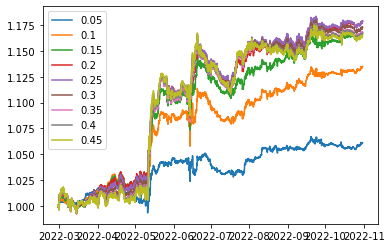

In [37]:
plt.plot(data_all,label=data_all.columns)
plt.legend()
plt.show()

In [ ]:
threshold=0.1
fee_rate=5/100/100
save_location=f"C:\\Users\\jason.huang\\research\\GP_momemntum\\crypto_binance_all_fee_{int(fee_rate * 100 * 100 * 10)}_turnover_threshold_{int(threshold * 100)}.pkl"
with open(save_location,'rb') as file:
    data=pickle.load(file)

#
# data.cash_bt_result.plot_total_nv(save_location=None)
#
# data.cash_bt_result.plot_sub_nv(save_location=None)
# data.cash_bt_result.calculate_stats()

In [ ]:
sub_strategy_file_location=r'C:\Users\jason.huang\research\GP_momemntum\nv_all_crypto_099_144.csv'
data=pd.read_csv(sub_strategy_file_location,index_col=0)
ret_all=data.diff().fillna(0)
# sns.heatmap(ret_all.corr())
ret_all.corr().describe().to_csv('1.csv')
ret_all.corr().to_csv('111.csv')

In [ ]:
sr=ret_all.mean()/ret_all.std()
sr.to_csv("sr.csv")

In [ ]:
i=112
data.iloc[:,i].plot()
print(data.columns[i])

In [ ]:
pd.to_datetime('2022-03-01')

In [90]:
# trade amount
threshold_list = [0.25]
fee_rate=0/100/100
data_all=pd.DataFrame()
indicator_all=pd.DataFrame()
for threshold in threshold_list:    
    save_location=f"C:\\Users\\jason.huang\\research\\GP_momemntum\\crypto_binance_all_future\\longshort_adv_vwap\\\\crypto_binance_all_all_sample_fee_{int(fee_rate * 100 * 100 * 10)}_turnover_threshold_{int(threshold * 100)}.pkl"
    with open(save_location,'rb') as file:
        data=pickle.load(file)
        data_one=data.cash_bt_result.bt_nv
        data_one.columns=[threshold]
        data_all=pd.concat([data_all,data_one],axis=1)
        indicator_one=data.cash_bt_result.calculate_stats()
        indicator_one['threshold']=threshold
        indicator_all=pd.concat([indicator_all,indicator_one])
trade_amount=data.cash_bt_result.bt_trade_amount_df

In [91]:
file_location=r'C:\Users\jason.huang\research\data_mining\GP\features\crypto_feature\freq_1H_base_volume.csv'
hour_amount=pd.read_csv(file_location,index_col=0)
hour_amount=hour_amount.replace(0,np.nan)
hour_amount.index=pd.to_datetime(hour_amount.index)

trade_pct=trade_amount.abs()/hour_amount
trade_pct.describe().to_csv("trade_pct_describe.csv")

quantile_amount_df=pd.DataFrame()
quantile_amount_df[0.1]=hour_amount.quantile(0.1)
quantile_amount_df[0.5]=hour_amount.quantile(0.5)
quantile_amount_df.to_csv("quantile_amount.csv")

In [126]:
fig, ax = plt.subplots(len(hour_amount.columns),4,figsize=(12*4,len(hour_amount.columns)*27/4))
for i in range(len(hour_amount.columns)):
    data=hour_amount.iloc[:,i]
    str_name=hour_amount.columns[i]
    ax[i][0].plot(data,label=str_name,alpha=0.7)
    ax[i][0].legend()
    ax[i,0].set_title(f"{str_name}_hourly_amount_all_ts_plot")

    sns.histplot(data,ax=ax[i][1],alpha=0.7)
    ax[i,1].set_title(f"{str_name}_hourly_amount_all_histogram")

    sns.histplot(data[data<data.quantile(0.95)],ax=ax[i][2],alpha=0.7)
    ax[i,2].set_title(f"{str_name}_hourly_amount_quantile_0.95_histogram")
    
    sns.histplot(data[data<data.quantile(0.7)],ax=ax[i][3],alpha=0.7)
    ax[i,3].set_title(f"{str_name}_hourly_amount_quantile_0.7_histogram")


fig.suptitle('Amount')
fig.tight_layout()  
graph_file_location=r'C:\Users\jason.huang\OneDrive - PinPOINT\桌面\result\Amount.jpeg'
plt.savefig(graph_file_location)
# plt.show()
plt.close()
    



In [ ]:
a=data_one
a.diff().fillna(0).mean()/((a/a.cummax()-1).min().abs()+0.0001)*np.sqrt(365*24)


In [ ]:
trade_amount=d.bt_trade_amount_df.abs()


<AxesSubplot:xlabel='ETCUSDT', ylabel='Count'>

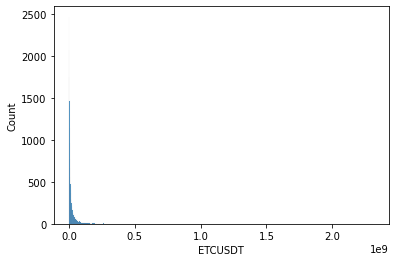

In [114]:
data=hour_amount.iloc[:,i]

# plt.hist(data[data<data.quantile(0.95)])
sns.histplot(data)


In [ ]:
amount_pct=trade_amount/hour_amount

In [ ]:
amount_pct.describe()

In [ ]:
trade_amount.iloc[:,2].plot()

In [ ]:
aum=1*10000*10000
asset=aum/len(hour_amount.columns)
asset

In [ ]:
a=asset/hour_amount.quantile(0.2)*0.15
a.sort_values

In [ ]:
file_location=r'C:\Users\jason.huang\research\data_mining\GP\features\crypto\freq_1H_volume.csv'
hour_amount=pd.read_csv(file_location,index_col=0)
hour_amount=hour_amount.replace(0,np.nan)
hour_amount.quantile(0.1)